In [1]:
import plotly as plt

In [2]:
%%capture
!pip install mysql-connector-python

In [3]:
import mysql.connector
import pandas as pd

In [4]:
db = mysql.connector.connect(
        host="localhost",
        user="root",
        password="eilat123",
        database="hrdb",
        use_pure=True
    )

mycursor = db.cursor()
print("Connection successful")

Connection successful


In [5]:
def sql_script(query):
    mycursor.execute(query)
    result = mycursor.fetchall()
    column_names = [i[0] for i in mycursor.description]
    df_Bees = pd.DataFrame(result, columns=column_names)

    return df_Bees

In [6]:
df_Bees = sql_script("SELECT * FROM bees.save_the_bees")

In [7]:
df_Bees

,state,state_code,num_colonies,max_colonies,lost_colonies,percent_lost,Lost(%),added_colonies,renovated_colonies,percent_renovated,...,other_pests_and_parasites,other_pests_and_parasites(%),diseases,diseases(%),pesticides,pesticides(%),other,other(%),unknown,unknown(%)
0,Alabama,AL,7000,7000,1800,26,26.0%,2800,250,4,...,5.4,5.40%,0.0,0.00%,2.2,2.20%,9.1,9.10%,9.4,9.40%
1,Arizona,AZ,35000,35000,4600,13,13.0%,3400,2100,6,...,20.5,20.50%,0.1,0.10%,0.0,0.00%,1.8,1.80%,3.1,3.10%
2,Arkansas,AR,13000,14000,1500,11,11.0%,1200,90,1,...,11.4,11.40%,1.5,1.50%,3.4,3.40%,1.0,1.00%,1.0,1.00%
3,California,CA,1440000,1690000,255000,15,15.0%,250000,124000,7,...,7.2,7.20%,3.0,3.00%,7.5,7.50%,6.5,6.50%,2.8,2.80%
4,Colorado,CO,3500,12500,1500,12,12.0%,200,140,1,...,0.9,0.90%,1.8,1.80%,0.6,0.60%,2.6,2.60%,5.9,5.90%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,West Virginia,WV,7500,8000,1100,14,14.0%,0,220,3,...,3.8,3.80%,0.8,0.80%,0.0,0.00%,6.4,6.40%,0.5,0.50%
1449,Wisconsin,WI,26000,47000,3500,7,7.0%,140,380,1,...,21.4,21.40%,19.4,19.40%,17.5,17.50%,9.9,9.90%,11.7,11.70%
1450,Wyoming,WY,19500,21000,3200,15,15.0%,640,0,0,...,5.9,5.90%,4.2,4.20%,0.0,0.00%,0.0,0.00%,7.4,7.40%
1451,Other,OT,30030,30030,480,2,2.0%,1190,130,0,...,18.5,18.50%,0.0,0.00%,0.0,0.00%,0.0,0.00%,0.7,0.70%


In [8]:
# Try saving to a different location where you have write permissions, such as your home directory or a temp folder
import os

output_path = os.path.expanduser("~/save_the_bees.csv")
df_Bees.to_csv(output_path, index=False)
print(f"CSV saved to {output_path}")

CSV saved to C:\Users\inbal/save_the_bees.csv


In [9]:
import matplotlib.pyplot as plt

In [10]:
df_Bees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   state                         1453 non-null   object 
 1   state_code                    1453 non-null   object 
 2   num_colonies                  1453 non-null   int64  
 3   max_colonies                  1453 non-null   int64  
 4   lost_colonies                 1453 non-null   int64  
 5   percent_lost                  1453 non-null   int64  
 6   Lost(%)                       1453 non-null   object 
 7   added_colonies                1453 non-null   int64  
 8   renovated_colonies            1453 non-null   int64  
 9   percent_renovated             1453 non-null   int64  
 10  Renovated(%)                  1453 non-null   object 
 11  quarter                       1453 non-null   int64  
 12  year                          1453 non-null   int64  
 13  var

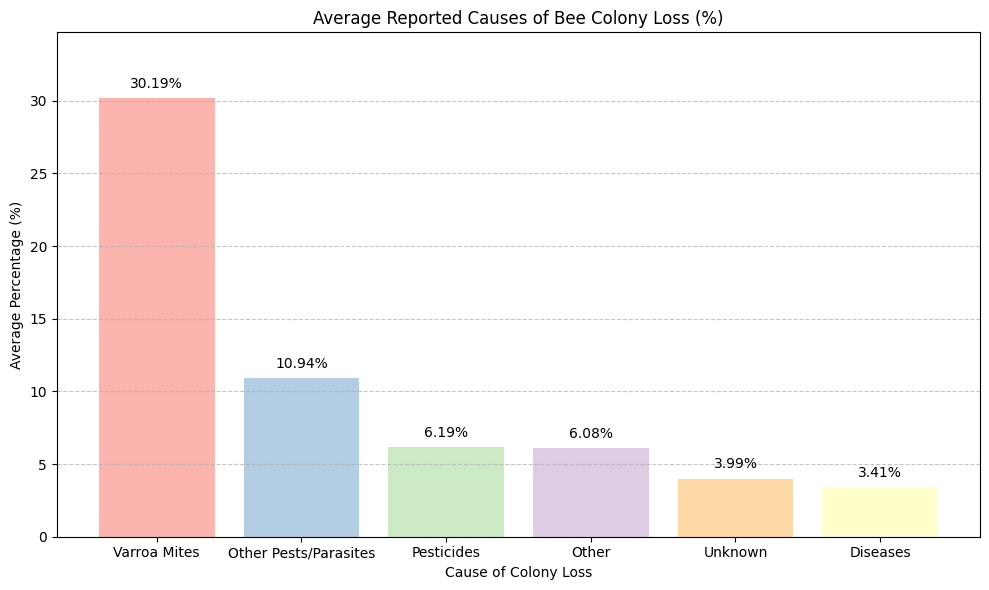

In [11]:
# Query the average reported causes of colony loss (%)
avg_causes = sql_script("""
SELECT 
    AVG(CAST(varroa_mites AS FLOAT)) AS avg_varroa_mites,
    AVG(CAST(other_pests_and_parasites AS FLOAT)) AS avg_other_pests_and_parasites,
    AVG(CAST(diseases AS FLOAT)) AS avg_diseases,
    AVG(CAST(pesticides AS FLOAT)) AS avg_pesticides,
    AVG(CAST(other AS FLOAT)) AS avg_other,
    AVG(CAST(unknown AS FLOAT)) AS avg_unknown
FROM bees.save_the_bees
""")

# Prepare data for plotting
causes = [
    "Varroa Mites",
    "Other Pests/Parasites",
    "Diseases",
    "Pesticides",
    "Other",
    "Unknown"
]
avg_percentages = [
    avg_causes['avg_varroa_mites'][0],
    avg_causes['avg_other_pests_and_parasites'][0],
    avg_causes['avg_diseases'][0],
    avg_causes['avg_pesticides'][0],
    avg_causes['avg_other'][0],
    avg_causes['avg_unknown'][0]
]

# Sort the data in descending order
import numpy as np
sorted_indices = np.argsort(avg_percentages)[::-1]
sorted_causes = [causes[i] for i in sorted_indices]
sorted_percentages = [avg_percentages[i] for i in sorted_indices]

# Plot the average reported causes of colony loss as a bar chart (descending)
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_causes, sorted_percentages, color=plt.cm.Pastel1.colors)
plt.xlabel('Cause of Colony Loss')
plt.ylabel('Average Percentage (%)')
plt.title('Average Reported Causes of Bee Colony Loss (%)')
plt.ylim(0, max(sorted_percentages)*1.15)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values
for bar, value in zip(bars, sorted_percentages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f"{value:.2f}%", 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [12]:
average_percent_lost_per_state = sql_script("""
SELECT state, AVG(percent_lost) AS avg_percent_lost
FROM bees.save_the_bees
GROUP BY state
ORDER BY avg_percent_lost DESC
LIMIT 5;
""")
print(average_percent_lost_per_state)

        state avg_percent_lost
0      Kansas          19.2581
1     Arizona          17.2903
2  New Mexico          17.2581
3   Tennessee          15.5161
4     Alabama          14.6452


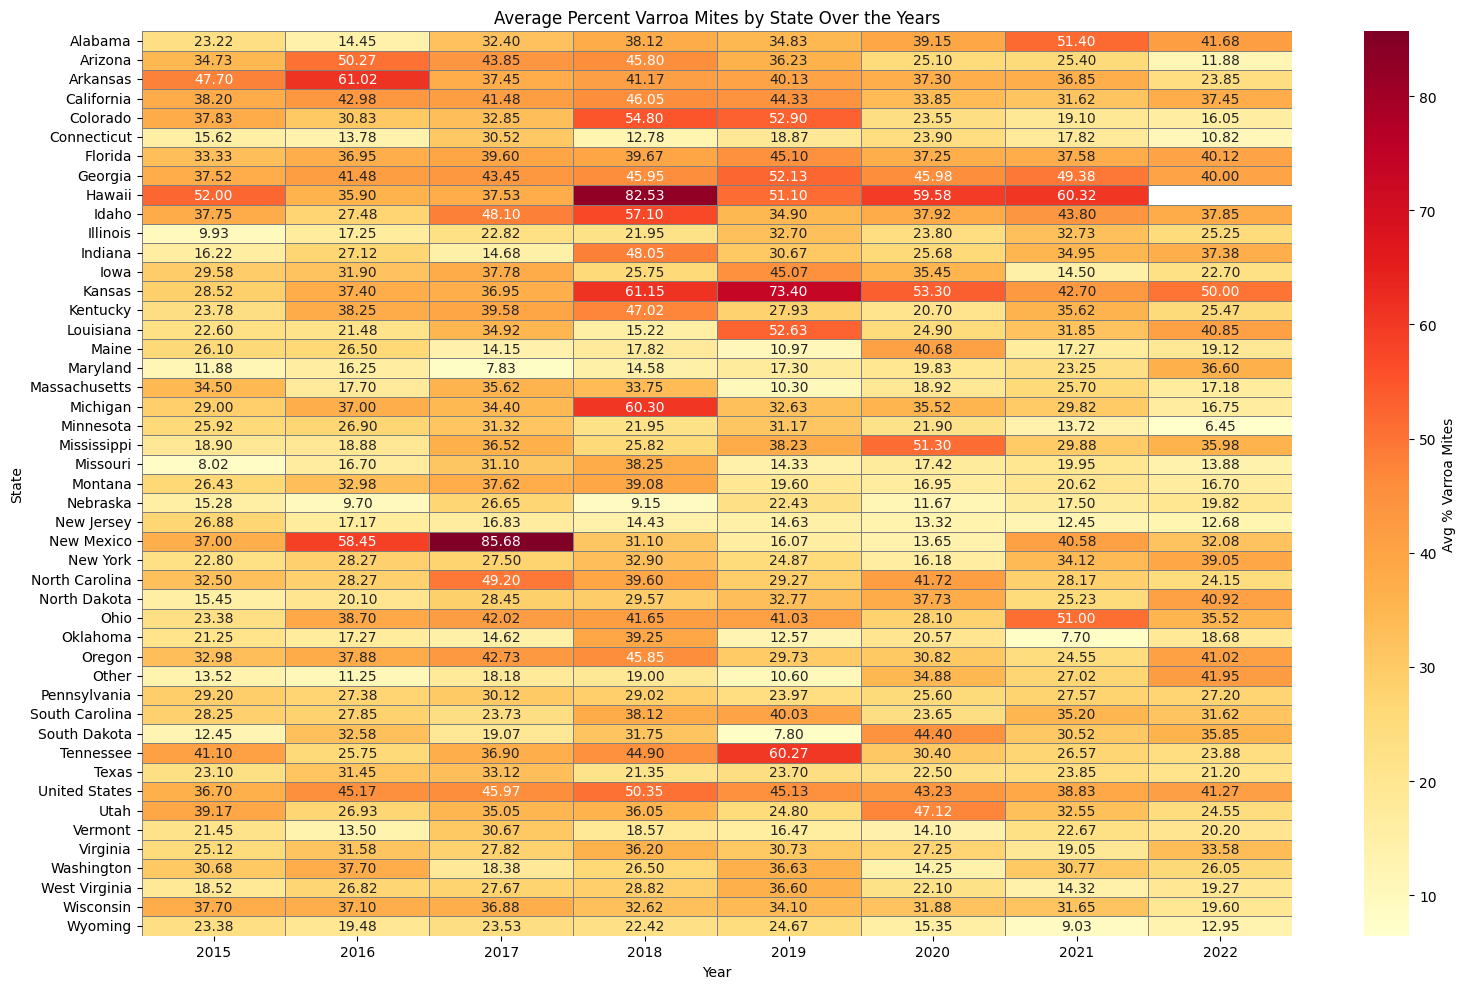

In [13]:
import seaborn as sns

# Query to get average percent Varroa mites by state and year
avg_varroa_by_state_year = sql_script("""
SELECT state, year, AVG(varroa_mites) AS avg_varroa_mites
FROM bees.save_the_bees
GROUP BY state, year
ORDER BY state, year;
""")

# Pivot the data for heatmap (states as rows, years as columns)
heatmap_data = avg_varroa_by_state_year.pivot(index='state', columns='year', values='avg_varroa_mites')

plt.figure(figsize=(16, 10))
sns.heatmap(
    heatmap_data, 
    cmap="YlOrRd", 
    linewidths=0.5, 
    linecolor='gray', 
    annot=True,  # Show the value for Average percent Varroa mites
    fmt=".2f",   # Format to 2 decimal places
    cbar_kws={'label': 'Avg % Varroa Mites'}
)
plt.title('Average Percent Varroa Mites by State Over the Years')
plt.xlabel('Year')
plt.ylabel('State')
plt.tight_layout()
plt.show()

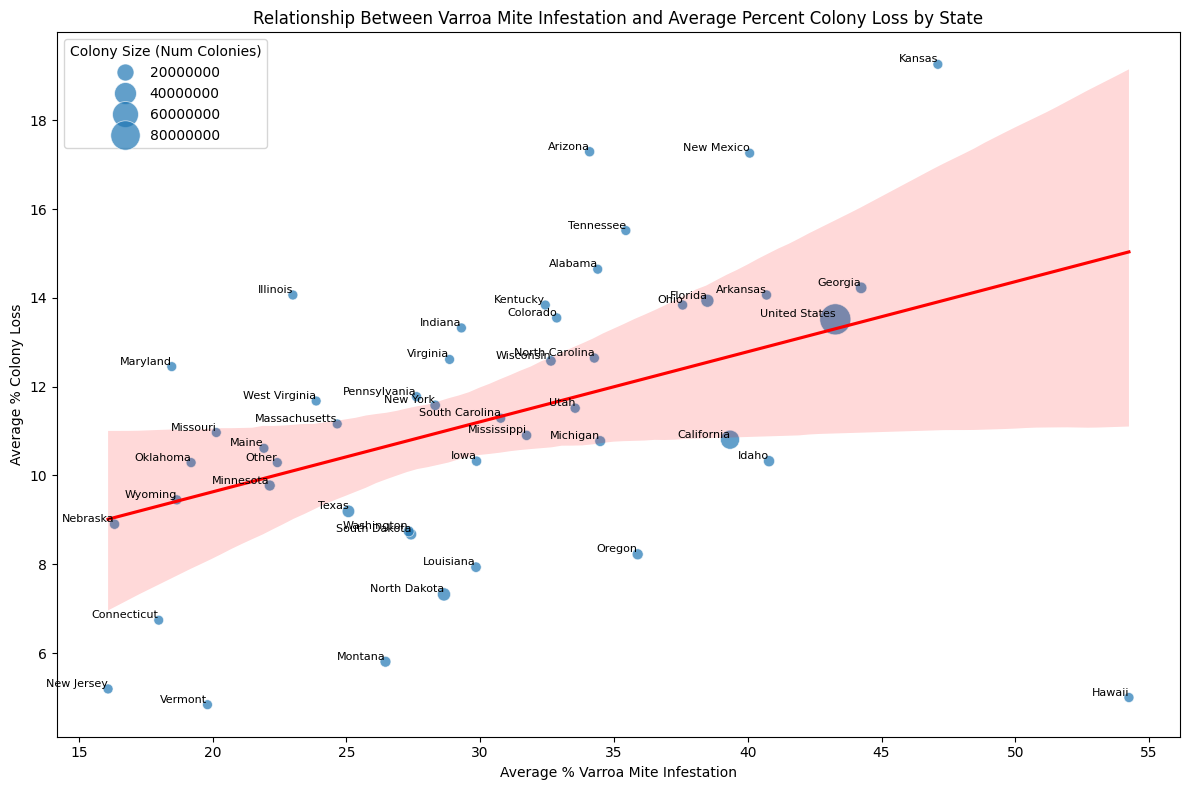

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Query to get average percent Varroa mites, average percent lost, and total num colonies per state
varroa_vs_loss = sql_script("""
SELECT 
    state, 
    AVG(varroa_mites) AS avg_varroa_mites,
    AVG(percent_lost) AS avg_percent_lost,
    SUM(num_colonies) AS total_num_colonies
FROM bees.save_the_bees
GROUP BY state
ORDER BY state;
""")

# Fix: Convert Decimal columns to float (if needed)
import decimal
import numpy as np

for col in ['avg_varroa_mites', 'avg_percent_lost', 'total_num_colonies']:
    if varroa_vs_loss[col].dtype == 'object' or isinstance(varroa_vs_loss[col].iloc[0], decimal.Decimal):
        varroa_vs_loss[col] = varroa_vs_loss[col].apply(float)

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=varroa_vs_loss,
    x='avg_varroa_mites',
    y='avg_percent_lost',
    size='total_num_colonies',
    sizes=(50, 500),
    legend='brief',
    alpha=0.7
)

# Add state labels to each point
for i, row in varroa_vs_loss.iterrows():
    plt.text(
        row['avg_varroa_mites'], 
        row['avg_percent_lost'], 
        row['state'], 
        fontsize=8, 
        ha='right', 
        va='bottom'
    )

# Calculate R^2 for the trend line
# Use numpy for linear regression to avoid sklearn dependency
X = varroa_vs_loss['avg_varroa_mites'].values
y = varroa_vs_loss['avg_percent_lost'].values
# Fit line: y = m*X + b
m, b = np.polyfit(X, y, 1)
y_pred = m * X + b
# Calculate R^2
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

# Add trend line
sns.regplot(
    data=varroa_vs_loss,
    x='avg_varroa_mites',
    y='avg_percent_lost',
    scatter=False,
    ax=scatter,
    color='red',
    line_kws={'label':f"Trend Line (R² = {r_squared:.2f})"}
)

plt.title('Relationship Between Varroa Mite Infestation and Average Percent Colony Loss by State')
plt.xlabel('Average % Varroa Mite Infestation')
plt.ylabel('Average % Colony Loss')
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, title='Colony Size (Num Colonies)', loc='upper left')
plt.tight_layout()
plt.show()

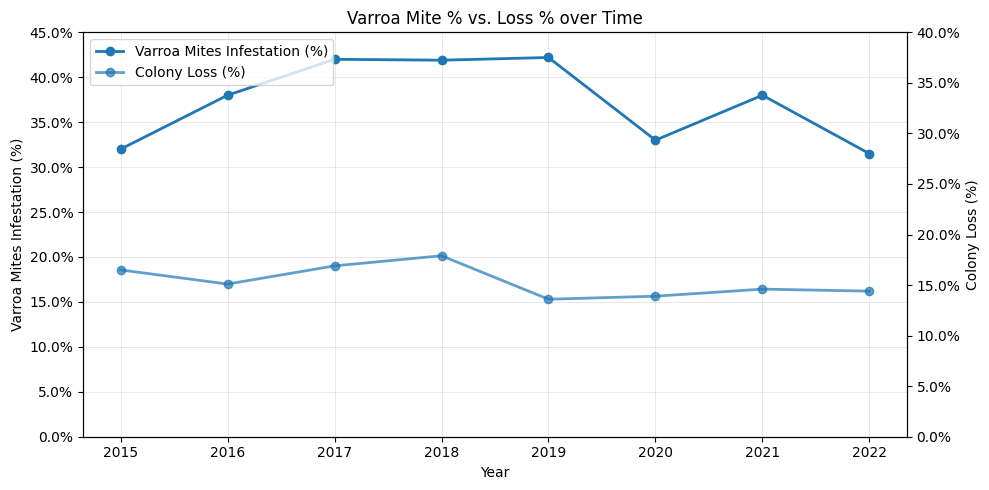

In [15]:

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Data (example values matching your image)
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
varroa = [0.32, 0.38, 0.42, 0.419, 0.422, 0.33, 0.38, 0.315]   # Varroa Mites Infestation (%)
loss   = [0.165, 0.151, 0.169, 0.179, 0.136, 0.139, 0.146, 0.144]  # Colony Loss (%)

fig, ax1 = plt.subplots(figsize=(10, 5))

# Left axis: Varroa %
ln1 = ax1.plot(years, varroa, linewidth=2, marker='o', label='Varroa Mites Infestation (%)')
ax1.set_ylabel('Varroa Mites Infestation (%)')
ax1.set_ylim(0, 0.45)
ax1.yaxis.set_major_formatter(PercentFormatter(1.0))
ax1.grid(True, which='both', axis='both', linewidth=0.5, alpha=0.4)

# Right axis: Colony Loss %
ax2 = ax1.twinx()
ln2 = ax2.plot(years, loss, linewidth=2, marker='o', alpha=0.7, label='Colony Loss (%)')
ax2.set_ylabel('Colony Loss (%)')
ax2.set_ylim(0, 0.40)
ax2.yaxis.set_major_formatter(PercentFormatter(1.0))

# Title, legend, labels
plt.title('Varroa Mite % vs. Loss % over Time')
lines = ln1 + ln2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

ax1.set_xlabel('Year')
ax1.set_xticks(years)

plt.tight_layout()
plt.show()